- residual block: activation으로 변화된괎과 원래의 값을 더해서 유지
- 0mobilenet : 모바일 환경에서도 잘 돌아감.
- VGG : Deep
- wide resnet : depth vs width
- ensemble

## Transfer learning
- **이미 학습된 모델의 지식 전이**
- 학습에서 앞에서 일반적인 특성, 뒤에서는 구체적인 특성을 학습
- **앞에서 학습한 것을 가져와서 새로운 도메인에 적용한 것**
- 적은 학습, 적은 데이터 필요, 정확도와 성능 면에서도 좋음

<br>
- 실제 상황에서 많은 데이터가 필요함.
- 특징이 비슷하면 앞 부분은 그대로 두고 fully connected 부분만 학습시키기

- 라이터인지 아닌지 linear한 모델?
- feature extraction한다 pre-train model 사용

**feature extraction** 

유사하면 일부는 학습시키지 않고 그대로 가져오고 나머지만 학습하여 작은 데이터로도 학습 가능

**fine tuning**
비슷하면서 데이터셋이 큰 경우 사용

---

### 데이터 적을 경우
- transfer learning 하기
- 가장 가까운(고양이는 없고 호랑이는 많음) -> 호랑이 학습 

https://github.com/tensorflow/models/tree/master/official : tensorflow 기반 모델

<br>

- life-long learning(평생 학습)
- meta learning - transfer 관련

||data양|domain diff|approach|
|--|--|--|--|
|1|small|비슷| Feature Extraction Approach : finetune linear classifier on **top layer**|
|2|Large|비슷|Fine Tuning Approach : finetune a few layers|
|3|small|상이|거의 불가, data augmentation|
|4|Large|상이|fine-tune a larger number of layers|

---


## transfer learning 구현
https://www.tensorflow.org/tutorials/images/transfer_learning

이미지 분류를 위한 전이 학습을 직관적인 시각에서 바라보면 모델이 충분히 크고 일반적인 데이터 집합에서 훈련된다면, 이 모델은 사실상 시각 세계의 일반적인 모델로서 기능할 것이라는 점입니다. 그런 다음 대규모 데이터셋에서 대규모 모델을 교육하여 처음부터 시작할 필요 없이 이러한 학습된 특징 맵을 활용할 수 있습니다.

<br>

- **사전 EDA중요**
    - feature extraction할지 fine tuning할지
    
 

In [1]:
import tensorflow as tf

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [5]:
# !pip install -U tensorflow-datasets --user

In [2]:
import tensorflow_datasets as tfds

In [3]:
dir(tfds)  # 

['GenerateMode',
 'ImageFolder',
 'ReadConfig',
 'Split',
 'TranslateFolder',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__init__py3',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'api',
 'as_dataframe',
 'as_numpy',
 'audio',
 'builder',
 'builder_cls',
 'core',
 'decode',
 'deprecated',
 'disable_progress_bar',
 'download',
 'even_splits',
 'features',
 'folder_dataset',
 'image',
 'image_classification',
 'is_dataset_on_gcs',
 'list_builders',
 'load',
 'object_detection',
 'proto',
 'public_api',
 'question_answering',
 'show_examples',
 'show_statistics',
 'structured',
 'summarization',
 'sys',
 'testing',
 'text',
 'translate',
 'units',
 'version',
 'video',
 'visualization']

In [4]:
tfds.load('cats_vs_dogs')  # keyword

# dir(tfds.image) 통해 이름 볼 수 있음
# dict형태로 출력된다.
# 한번 다운로드 받으면 cache

W1012 20:30:29.046868 26760 cats_vs_dogs.py:104] 1738 images were corrupted and were skipped


Shuffling and writing examples to C:\Users\Gyu\tensorflow_datasets\cats_vs_dogs\4.0.0.incompleteN3EC2T\cats_vs_dogs-train.tfrecord


Dataset cats_vs_dogs downloaded and prepared to C:\Users\Gyu\tensorflow_datasets\cats_vs_dogs\4.0.0. Subsequent calls will reuse this data.


{'train': <PrefetchDataset shapes: {image: (None, None, 3), image/filename: (), label: ()}, types: {image: tf.uint8, image/filename: tf.string, label: tf.int64}>}

In [6]:
len(tfds.load('cats_vs_dogs', with_info=True))

2

In [9]:
raw, metadata = tfds.load('cats_vs_dogs', as_supervised=True ,with_info=True)

In [8]:
metadata # 데이터 정보

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    version=4.0.0,
    description='A large set of images of cats and dogs.There are 1738 corrupted images that are dropped.',
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=23262,
    splits={
        'train': 23262,
    },
    supervised_keys=('image', 'label'),
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
    title = {Asirra: A CAPTCHA that Exploits Interest-Aligned Manual Image Categorization},
    booktitle = {Proceedings of 14th ACM Conference on Computer and Communications Security (CCS)},
    ye

In [12]:
raw, metadata = tfds.load('cats_vs_dogs', 
                          split = 'train',
                          as_supervised=True ,with_info=True)
# test면 error남

In [13]:
raw

<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [14]:
raw, metadata = tfds.load('cats_vs_dogs', 
                          split = ['train[:80%]','train[80%:]'],
                          as_supervised=True ,with_info=True)
raw

# PrefetchDataset : 파이프라인 제공

[<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>,
 <PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>]

In [15]:
raw, metadata = tfds.load('cats_vs_dogs', 
                          split = ['train[:80%]','train[80%:]'],
                          as_supervised=False ,with_info=True)
raw  # as_supervised : label , train나눠줌

[<PrefetchDataset shapes: {image: (None, None, 3), image/filename: (), label: ()}, types: {image: tf.uint8, image/filename: tf.string, label: tf.int64}>,
 <PrefetchDataset shapes: {image: (None, None, 3), image/filename: (), label: ()}, types: {image: tf.uint8, image/filename: tf.string, label: tf.int64}>]

### train, valid, test

In [16]:
(train,validation,test), metadata = tfds.load('cats_vs_dogs', 
                          split = ['train[:80%]','train[80%:90%]','train[90%:]'],
                          as_supervised=True ,with_info=True)

PrefetchDataset : tf.data 성질을 가지고 있음.

In [17]:
metadata.features
# dir(metadata) 로 확인
# label이  classLabel type임.

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'image/filename': Text(shape=(), dtype=tf.string),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
})

In [24]:
metadata.features['label'].int2str(1)

'dog'

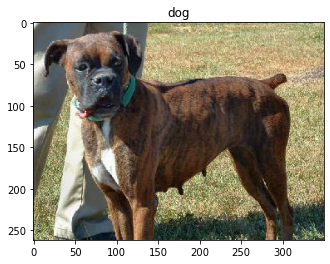

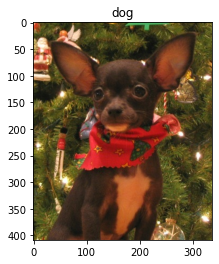

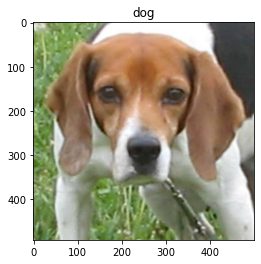

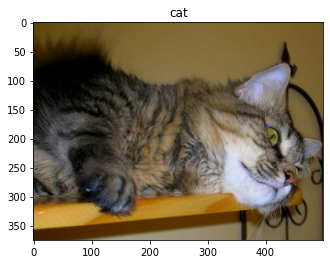

In [25]:
import matplotlib.pyplot as plt
for i in train.take(4):
    plt.figure()
    plt.imshow(i[0].numpy())  # len으로 2개임을 확인
    plt.title(metadata.features['label'].int2str(i[1]))

image마다 사이즈가 다르다

1. crop 
2. resize

tensor 바로 쓰는 tf.image 활용

- tf.keras.preprocessing.image
- tf.keras.layers.experimental.preprocessing

In [27]:
# dir(tf.image)

In [32]:
def format(image,label):
    image = tf.cast(image,tf.float32)
    image = (image/127.5) - 1  # Zero center (-1,1)
    image = tf.image.resize(image,[160,160])
    return image,label

train.map(format)

<MapDataset shapes: ((160, 160, 3), ()), types: (tf.float32, tf.int64)>

255나누면 크기가 0~1사이가 되는데 zero-centering 되도록
    - 더 넓은 범위 -> 좋다는 보장은 없음

In [33]:
def format(image,label):
    image = tf.cast(image,tf.float32)
    image = image/(127.5) - 1
    image = tf.image.resize(image,[160,160])
    return image,label

train.map(format)

<MapDataset shapes: ((160, 160, 3), ()), types: (tf.float32, tf.int64)>

### 모델 불러오기

- 성능 정확도, 메모리, trainable parameters , **효율성** 비교해야함 
    - 정확도 : ResNet50, Resnet101, SENet
    - 효율성: MobileNet, ShffuleNEts
    - real-time, running on mobile

In [34]:
m1 = tf.keras.applications.MobileNet()
m2 = tf.keras.applications.MobileNetV2()

17227776/17225924 [==============================] - 2s 0us/step


In [37]:
# m1.summary()

In [36]:
m2.summary()  # connected가 있다.

# depthwiseConvolution : convol해서 각 elementwise해서 더했는데 그걸 안하고 합침(포갬)
# parameter가 적어지는 효과
# googlenet에서 1 * 1 이 차원 축소 역할을 하는 것과 비슷

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [38]:
# include_top : 예측하는 fully connect가 붙는지 아닌지
m3 = tf.keras.applications.MobileNetV2(include_top=False)

W1012 21:46:13.705001 26760 mobilenet_v2.py:285] `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.


9412608/9406464 [==============================] - 1s 0us/step


In [41]:
len(m2.layers)

155

In [42]:
m2.layers[3].trainable # 학습 시킬지 안시킬지

True

In [46]:
m3.trainable = False
# m3.summary()
# Trainable params이 0

In [47]:
global_average_pooling = tf.keras.layers.GlobalAveragePooling2D()
last = tf.keras.layers.Dense(1)

In [48]:
model = tf.keras.models.Sequential([
    m3, global_average_pooling, last
])
# 1280개로 나오기 때문에 마지막에 dense사용 필요해서 1281개만 학습 시킴 

In [49]:
model.summary()
# input에서 None이 3개 -> 구조를 맞춰줘야 함

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, None, None, 1280)  2257984   
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


batch랑 shape 맞춰야됨.

In [ ]:
train.map(format).batch(32)

In [64]:
# 크기 맞추기, 모델 가져오기
m3 = tf.keras.applications.MobileNetV2(include_top=False, input_shape=(160,160,3))
m3.trainable = False
# feature extraction 사용

In [57]:
test = train.map(format).batch(32).take(1)
# m3(test) # shape맞췄는데 에러 남...

In [62]:
train = train.map(format)  # 전체 다 바꾸기 위해 map
train_batch = train.batch(32) # batch 지정
for image,label in train_batch.take(1):
    pass
m3(image)

<tf.Tensor: shape=(32, 5, 5, 1280), dtype=float32, numpy=
array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          2.5692925 , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          2.5786238 , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          2.7699046 , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.     

In [65]:
model = tf.keras.models.Sequential([
    m3, global_average_pooling, last
])

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [68]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             optimizer='adam')

In [70]:
model.fit(train_batch, epochs=1)

582/582 [==============================] - 180s 309ms/step - loss: 0.0493
